<a href="https://colab.research.google.com/github/OleksiiLatypov/House_Prices/blob/main/used_car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'playground-series-s4e9:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F76728%2F9057646%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240912%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240912T203044Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D068ac851739e0d26fd886d239f32b5425a731e23bc00ecac006bfc4715f32a0fcce4121ceef9db22144797076efbdd70a6d2994d63a247589f173737b9254332ed3dd7d9db7466822ea9ebaf1cd4c90355b7e35df18a20016deca0edc90ead9c8286dca246ddddf9e910a7a47fe66de696aff620431e1884e14d1e52cb03bbb8502d14c3152c0464e69352f33dc25b943fa3b3c9ff918253d931608c53191424a2b32fc33237bf174afcbbbc917e6d04a7aca7f5f6de0d11c9da8c3d499f4d252d859a2c3149d2ffd1f86f2515244286e02b6abc499d50427b5a15487ea047f0ce5c72d9a561a7ce4a2377f33ce3b10cc361feaf833d5d6c25203cca5bab6aed'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import Lasso, Ridge, SGDRegressor, LinearRegression


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e9/sample_submission.csv
/kaggle/input/playground-series-s4e9/train.csv
/kaggle/input/playground-series-s4e9/test.csv


In [ ]:
train = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')

In [ ]:
train = train.drop('id', axis=1)
test = test.drop('id', axis=1)

In [ ]:
train.shape

(188533, 12)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


In [ ]:
test.shape

(125690, 11)

In [ ]:
train.describe()

,model_year,milage,price
count,188533.000000,188533.000000,1.885330e+05
mean,2015.829998,65705.295174,4.387802e+04
std,5.660967,49798.158076,7.881952e+04
min,1974.000000,100.000000,2.000000e+03
25%,2013.000000,24115.000000,1.700000e+04
50%,2017.000000,57785.000000,3.082500e+04
75%,2020.000000,95400.000000,4.990000e+04
max,2024.000000,405000.000000,2.954083e+06


In [ ]:
train.describe(include='object')

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
count,188533,188533,183450,188533,188533,188533,188533,186081,167114
unique,57,1897,7,1117,52,319,156,2,1
top,Ford,F-150 XLT,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
freq,23088,2945,165940,3462,49904,48658,107674,144514,167114


In [ ]:
100* (train.isna().sum() / len(train)).sort_values(ascending=False)

clean_title     11.360876
fuel_type        2.696080
accident         1.300568
brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
engine           0.000000
transmission     0.000000
ext_col          0.000000
int_col          0.000000
price            0.000000
dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


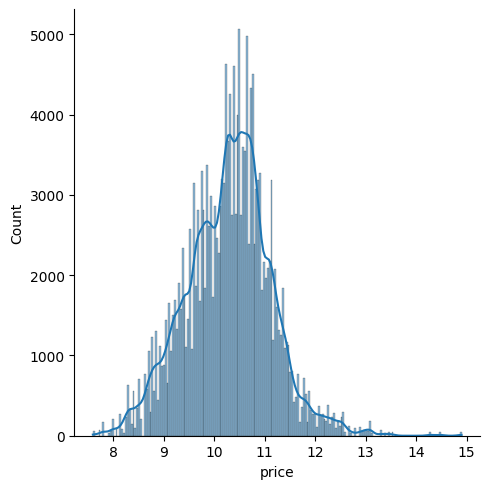

In [ ]:
sns.displot(np.log(train['price']), kde=True)

In [ ]:
train['clean_title'].value_counts()

clean_title
Yes    167114
Name: count, dtype: int64

In [ ]:
df = pd.concat([train, test], axis=0, ignore_index=True)

In [ ]:
df['brand'].unique()

array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Tesla', 'Cadillac', 'Land', 'GMC', 'Toyota',
       'Hyundai', 'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'RAM',
       'Hummer', 'Alfa', 'INFINITI', 'Jeep', 'Porsche', 'McLaren',
       'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar', 'Acura', 'Kia',
       'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn',
       'Bentley', 'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Lamborghini',
       'Chrysler', 'Lucid', 'Lotus', 'Scion', 'smart', 'Karma',
       'Plymouth', 'Suzuki', 'FIAT', 'Saab', 'Bugatti', 'Mercury',
       'Polestar', 'Maybach'], dtype=object)

In [ ]:
avarage_price_by_brand = train.groupby('brand')['price'].agg(['mean', 'median'])
avarage_price_by_brand.sort_values(by='median', ascending=False).astype('int')

,mean,median
brand,,
Bugatti,169600,220000
Lamborghini,159176,102000
McLaren,123261,87500
Rivian,81089,78000
Rolls-Royce,135488,77500
Ferrari,116751,75500
Bentley,129272,73600
Aston,112364,67650
Lucid,63310,56000


In [ ]:
lux_auto = avarage_price_by_brand[avarage_price_by_brand['mean'] > 30000]
lux_auto.index

Index(['Alfa', 'Aston', 'Audi', 'BMW', 'Bentley', 'Bugatti', 'Cadillac',
       'Chevrolet', 'Dodge', 'FIAT', 'Ferrari', 'Ford', 'GMC', 'Genesis',
       'INFINITI', 'Jaguar', 'Jeep', 'Karma', 'Kia', 'Lamborghini', 'Land',
       'Lexus', 'Lincoln', 'Lucid', 'Maserati', 'Maybach', 'McLaren',
       'Mercedes-Benz', 'Polestar', 'Porsche', 'RAM', 'Rivian', 'Rolls-Royce',
       'Suzuki', 'Tesla', 'Volvo', 'smart'],
      dtype='object', name='brand')

In [ ]:
df['premium_auto'] = df['brand'].apply(lambda x: 1 if x in lux_auto.index else 0)
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,premium_auto
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200.0,0
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999.0,1
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900.0,1
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000.0,1
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500.0,1


In [ ]:
horsepower = []
engine = []
num_of_cylinders = []
for row in df['engine'][:25]:
    hp = row.split()[0]
    if 'HP' in hp:
        horsepower.append(hp.replace('HP', ''))
    else:
        horsepower.append(0)
    cylinder = row.split()[2]
    if row.split()[3] == 'Cylinder':
        num_of_cylinders.append(cylinder)
    if row.split()[1].startswith('V'):
         num_of_cylinders.append(row.split()[1])
    print(row.split())
horsepower
num_of_cylinders

['172.0HP', '1.6L', '4', 'Cylinder', 'Engine', 'Gasoline', 'Fuel']
['252.0HP', '3.9L', '8', 'Cylinder', 'Engine', 'Gasoline', 'Fuel']
['320.0HP', '5.3L', '8', 'Cylinder', 'Engine', 'Flex', 'Fuel', 'Capability']
['420.0HP', '5.0L', '8', 'Cylinder', 'Engine', 'Gasoline', 'Fuel']
['208.0HP', '2.0L', '4', 'Cylinder', 'Engine', 'Gasoline', 'Fuel']
['252.0HP', '2.0L', '4', 'Cylinder', 'Engine', 'Gasoline', 'Fuel']
['333.0HP', '3.0L', 'V6', 'Cylinder', 'Engine', 'Gasoline', 'Fuel']
['355.0HP', '5.3L', '8', 'Cylinder', 'Engine', 'Flex', 'Fuel', 'Capability']
['2.7L', 'V6', '24V', 'PDI', 'DOHC', 'Twin', 'Turbo']
['425.0HP', '3.0L', 'Straight', '6', 'Cylinder', 'Engine', 'Gasoline', 'Fuel']
['312.0HP', '3.6L', 'V6', 'Cylinder', 'Engine', 'Gasoline', 'Fuel']
['Electric', 'Motor', 'Electric', 'Fuel', 'System']
['420.0HP', '6.2L', '8', 'Cylinder', 'Engine', 'Gasoline', 'Fuel']
['333.0HP', '3.0L', 'V6', 'Cylinder', 'Engine', 'Gasoline', 'Fuel']
['523.0HP', '4.4L', '8', 'Cylinder', 'Engine', 'Gasolin

['4',
 '8',
 '8',
 '8',
 '4',
 '4',
 'V6',
 '8',
 'V6',
 'V6',
 '8',
 'V6',
 '8',
 '8',
 '8',
 '8',
 '8',
 'V10',
 '8',
 'V6',
 'V6',
 '4']

In [ ]:
lexus_data.mean()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
train['brand'].value_counts()

brand
Ford             21348
Mercedes-Benz    16530
BMW              15461
Chevrolet        15170
Audi              9111
Porsche           9025
Toyota            7862
Land              7857
Lexus             7622
Jeep              5330
Cadillac          4330
Nissan            3536
RAM               3391
INFINITI          3103
GMC               2970
Dodge             2967
Mazda             2393
Subaru            2281
Lincoln           2261
Honda             1828
Acura             1738
Hyundai           1714
Kia               1659
Volkswagen        1608
Jaguar            1064
MINI              1035
Bentley           1012
Maserati           836
Genesis            826
Buick              720
Chrysler           693
Volvo              656
Mitsubishi         532
Pontiac            530
Rolls-Royce        521
Hummer             515
Alfa               508
Lamborghini        500
Tesla              343
Ferrari            271
Aston              216
McLaren            188
Saturn             144
Scion

In [ ]:
# cat_columns = df.select_dtypes(include=['object'])
# missing_cols = [col for col in cat_columns.columns if cat_columns[col].isna().any()]
#missing_cols = ['fuel_type', 'accident']

In [ ]:
# for col in missing_cols:
#     df.loc[:, col] = df.loc[:, col].fillna(df.loc[:, col].mode()[0])

In [ ]:
encoder=LabelEncoder()
train['brand']=encoder.fit_transform(train['brand'])
train['model']=encoder.fit_transform(train['model'])
#df['fuel_type']=encoder.fit_transform(df['fuel_type'])
train['engine']=encoder.fit_transform(train['engine'])
train['transmission']=encoder.fit_transform(train['transmission'])
train['ext_col']=encoder.fit_transform(train['ext_col'])
train['int_col']=encoder.fit_transform(train['int_col'])
train['accident']=encoder.fit_transform(train['accident'])
#df['clean_title']=encoder.fit_transform(df['clean_title'])

In [ ]:
train = pd.get_dummies(train, dtype='int')

In [ ]:
train.head()

,brand,model,model_year,milage,engine,transmission,ext_col,int_col,accident,price,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,fuel_type_–
0,31,493,2007,213000,110,38,306,71,1,4200,0,0,1,0,0,0,0
1,28,925,2002,143250,358,38,257,10,0,4999,0,0,1,0,0,0,0
2,9,1567,2002,136731,627,38,37,71,1,13900,0,1,0,0,0,0,0
3,16,755,2017,19500,846,49,28,14,1,45000,0,0,1,0,0,0,0
4,36,1072,2021,7388,252,23,28,10,1,97500,0,0,1,0,0,0,0


In [ ]:
train.shape

(162610, 17)

In [ ]:
# train_df = df.iloc[:188533, :]
# test_df = df.iloc[188533:, :]

In [ ]:
X = train.copy()

In [ ]:
y = X['price']
X = X.drop('price', axis=1)

In [ ]:
y

0          4200
1          4999
2         13900
3         45000
4         97500
          ...  
188527    14500
188528    27500
188529    30000
188530    86900
188532    28995
Name: price, Length: 162610, dtype: int64

In [ ]:
len(y)

162610

In [ ]:
# #for test split 0.3 is the best !!!
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from catboost import CatBoostRegressor


clf_catboost = CatBoostRegressor(iterations=600,
                                  learning_rate=0.0311,
#                                  depth=6,
#                                  l2_leaf_reg=3,
                                # border_count=100,
                                 verbose=0)  # verbose=0 to suppress output during cross-validation


# Define k-fold cross-validation
n_splits = 5  # number of folds
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation and evaluate RMSE
rmse_scores = -cross_val_score(clf_catboost, X, y, scoring='neg_root_mean_squared_error', cv=kf)

# Calculate mean and standard deviation of RMSE
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"Mean RMSE: {mean_rmse:.4f}")
print(f"Standard Deviation of RMSE: {std_rmse:.4f}")

clf_catboost.fit(X, y)

Mean RMSE: 70834.3248
Standard Deviation of RMSE: 4331.4978


In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from lightgbm import LGBMRegressor
import numpy as np

# Initialize the LGBMRegressor model
clf_lightgbm = LGBMRegressor(n_estimators=700,
                             #learning_rate=0.0311,
                             #max_depth=6,
                             #reg_alpha=3,
                             #num_leaves=31,
                             verbose=-1)  # verbose=-1 to suppress output during cross-validation

# Define k-fold cross-validation
n_splits = 5  # number of folds
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation and evaluate RMSE
rmse_scores = -cross_val_score(clf_lightgbm, X, y, scoring='neg_root_mean_squared_error', cv=kf)

# Calculate mean and standard deviation of RMSE
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"Mean RMSE (LightGBM): {mean_rmse:.4f}")
print(f"Standard Deviation of RMSE (LightGBM): {std_rmse:.4f}")

# Fit the LightGBM model to the training data
clf_lightgbm.fit(X, y)


Mean RMSE (LightGBM): 72316.9100
Standard Deviation of RMSE (LightGBM): 4217.8029


LGBMRegressor(n_estimators=700, verbose=-1)

# DONT TOCH THIS BELOW

In [ ]:
# #for test split 0.3 is the best !!!
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from catboost import CatBoostRegressor


clf_catboost = CatBoostRegressor(iterations=700,
                                 learning_rate=0.0311,
                                 depth=6,
                                 l2_leaf_reg=3,
                                # border_count=100,
                                 verbose=0)  # verbose=0 to suppress output during cross-validation


# Define k-fold cross-validation
n_splits = 5  # number of folds
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation and evaluate RMSE
rmse_scores = -cross_val_score(clf_catboost, X, y, scoring='neg_root_mean_squared_error', cv=kf)

# Calculate mean and standard deviation of RMSE
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"Mean RMSE: {mean_rmse:.4f}")
print(f"Standard Deviation of RMSE: {std_rmse:.4f}")

clf_catboost.fit(X, y)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/catboost/core.py", line 5827, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline,
  File "/opt/conda/lib/python3.10/site-packages/catboost/core.py", line 2400, in _fit
    self._train(
  File "/opt/conda/lib/python3.10/site-packages/catboost/core.py", line 1780, in _train
    self._object._train(train_pool, test_pool, params, allow_clear_pool, init_model._object if init_model else None)
  File "_catboost.pyx", line 4833, in _catboost._CatBoost._train
  File "_catboost.pyx", line 4882, in _catboost._CatBoost._train
_catboost.CatBoostError: /src/catboost/catboost/libs/metrics/metric.cpp:6769: metric/loss-function RMSE do not allows nan value on target


In [ ]:
# test_df = test_df.drop('price', axis=1)

In [ ]:
test.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident
0,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported
1,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported
4,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported
5,Chevrolet,Express 2500 Work Van,2013,99524,Gasoline,285.0HP 4.8L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported
6,Lexus,RX 350 Base,2008,194000,Gasoline,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Silver,Gray,None reported


In [ ]:
test_dataset = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')

In [ ]:
(100* (test_dataset.isna().sum())/len(test_dataset)).sort_values(ascending=False)

clean_title     11.328666
fuel_type        2.691543
accident         1.298433
id               0.000000
brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
engine           0.000000
transmission     0.000000
ext_col          0.000000
int_col          0.000000
dtype: float64

In [ ]:
test_dataset = test_dataset.drop('clean_title', axis=1)

In [ ]:
missing_columns = ['fuel_type', 'accident']

In [ ]:
for col in missing_columns:
    test_dataset.loc[:, col] = test_dataset.loc[:, col].fillna(test_dataset.loc[:, col].mode()[0])

In [ ]:
encoder=LabelEncoder()
test_dataset['brand']=encoder.fit_transform(test_dataset['brand'])
test_dataset['model']=encoder.fit_transform(test_dataset['model'])
#df['fuel_type']=encoder.fit_transform(df['fuel_type'])
test_dataset['engine']=encoder.fit_transform(test_dataset['engine'])
test_dataset['transmission']=encoder.fit_transform(test_dataset['transmission'])
test_dataset['ext_col']=encoder.fit_transform(test_dataset['ext_col'])
test_dataset['int_col']=encoder.fit_transform(test_dataset['int_col'])
test_dataset['accident']=encoder.fit_transform(test_dataset['accident'])

In [ ]:
test_dataset = pd.get_dummies(test_dataset, dtype='int')

In [ ]:
test_dataset.head()

,id,brand,model,model_year,milage,engine,transmission,ext_col,int_col,accident,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,fuel_type_–
0,188533,26,1388,2015,98000,326,16,302,10,1,0,0,1,0,0,0,0
1,188534,26,1375,2020,9142,787,31,261,14,1,0,0,0,1,0,0,0
2,188535,14,636,2022,28121,541,3,302,57,1,0,0,1,0,0,0,0
3,188536,3,182,2016,61258,193,39,259,14,1,0,0,1,0,0,0,0
4,188537,3,181,2018,59000,365,38,127,14,1,0,0,1,0,0,0,0


In [ ]:
test_id = test_dataset['id']

In [ ]:
test_dataset = test_dataset.drop('id', axis=1)

In [ ]:
# submit = pd.read_csv("/kaggle/input/playground-series-s4e9/sample_submission.csv")
# pred = clf_catboost.predict(test_df)
# submit["price"] = pred
# submit.to_csv("submission.csv", index=False)
# submit.head()

,id,price
0,188533,18456.531661
1,188534,77560.629778
2,188535,52519.133365
3,188536,20244.480074
4,188537,30726.856257


In [ ]:
#test_id = test_dataset['id']
test_predictions_catboost = clf_catboost.predict(test_dataset)
print(test_predictions_catboost[:10])
# Prepare submission
test_predictions_catboost_df = pd.DataFrame(test_predictions_catboost, columns=['price'])
submit_df = pd.concat([test_id, test_predictions_catboost_df], axis=1)
submit_df.to_csv('submission_1.csv', index=False)

[17236.04449508 99114.98065085 53579.33338862 22607.31196442
 30586.8243416  15777.80053465 14439.47681612 42265.09881711
 95684.74422751 35971.22709215]


In [ ]:
submit_df.head()

,id,price
0,188533,17236.044495
1,188534,99114.980651
2,188535,53579.333389
3,188536,22607.311964
4,188537,30586.824342


In [ ]:
train_predictions_catboost = clf_catboost.predict(X.iloc[:10, :])
train_predictions_catboost

array([ 9271.10132533,  9394.04603591, 12643.83118629, 63366.45447781,
       69883.22790108, 38520.76167256, 29871.8693031 , 21759.56720057,
       39394.4212853 , 35246.6149881 ])

In [ ]:
# train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [ ]:
sample = pd.read_csv('/kaggle/input/playground-series-s4e9/sample_submission.csv')
sample.head()

,id,price
0,188533,43878.016
1,188534,43878.016
2,188535,43878.016
3,188536,43878.016
4,188537,43878.016
